<a href="https://colab.research.google.com/github/jess22jess/EDP/blob/main/MetGauss_Seidel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MÉTODO DE GAUSS-SEIDEL PARA LA ECUACIÓN DE LAPLACE
Problema de Dirichlet con condiciones específicas
Iniciando método de Gauss-Seidel para la ecuación de Laplace
Tamaño de la malla: 5x5
Tolerancia: 1e-05
Máximo de iteraciones: 1000
------------------------------------------------------------
Convergencia alcanzada en 17 iteraciones
------------------------------------------------------------
RESUMEN DE LA SIMULACIÓN
          Parámetro    Valor
    Tamaño de malla      5x5
   Número de puntos       25
   Tamaño de paso h    0.500
Iteraciones totales       17
        Error final 7.39e-06
Tiempo de ejecución      N/A


VALORES SELECCIONADOS DE LA SOLUCIÓN
     x      y  u(x,y)
0.0000 0.0000  0.0000
0.0000 0.5000  0.0000
0.0000 1.0000  0.0000
0.0000 1.5000  0.0000
0.0000 2.0000  0.0000
0.5000 0.0000  0.0000
0.5000 0.5000  0.1094
0.5000 1.0000  0.2098
0.5000 1.5000  0.3237
0.5000 2.0000  0.5000
1.0000 0.0000  0.0000
1.0000 0.5000  0.2277
1.0000 1.0000  0.4062
1.0000 1.5000  0.5848
1.0000 2

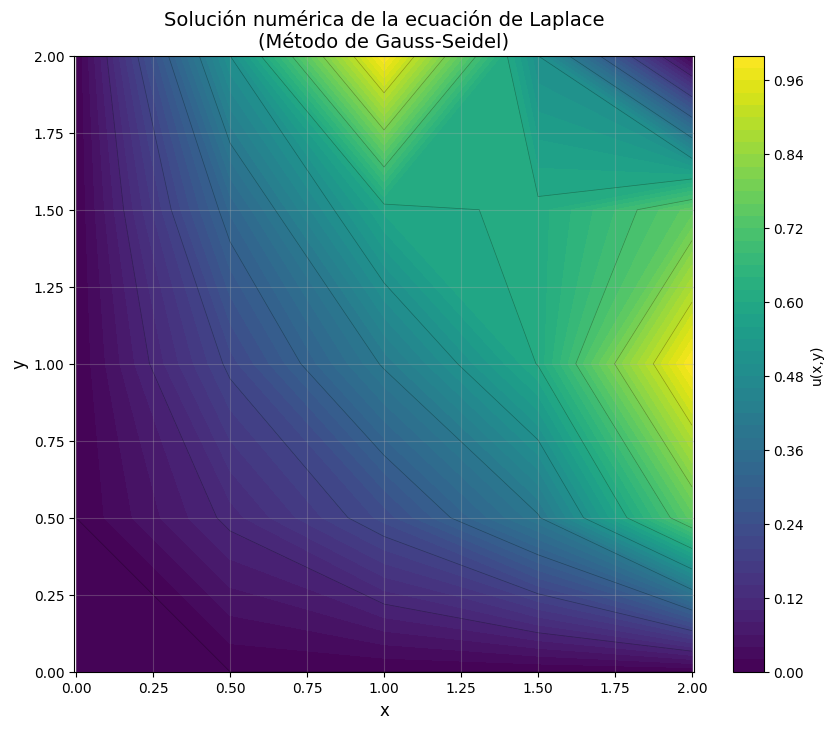

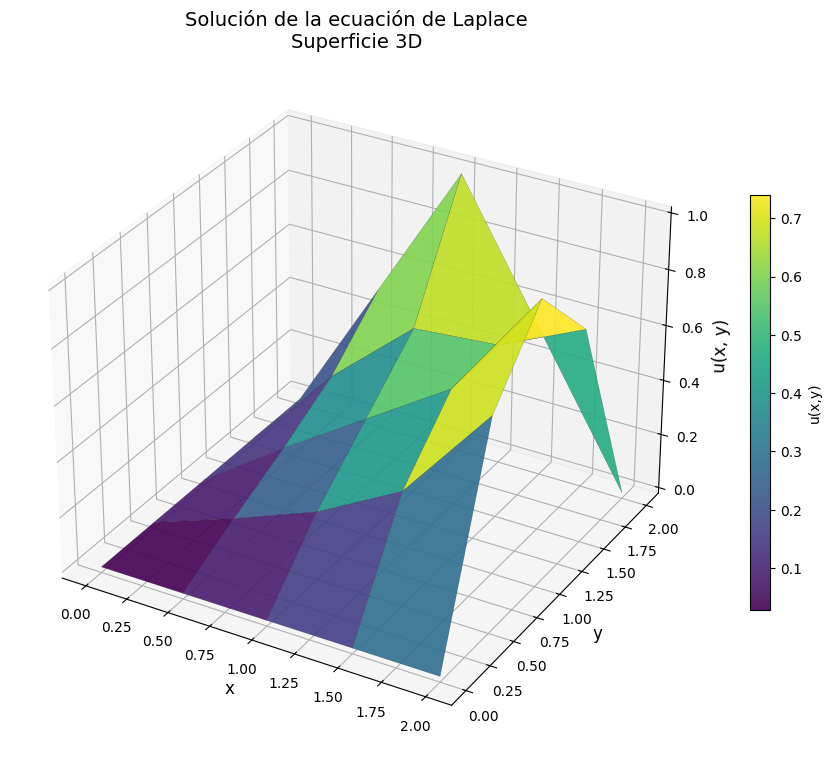

VERIFICACIÓN DE LA SOLUCIÓN
Valores en las esquinas:
u(0.0, 0.0) = 0.000000
u(0.0, -0.5) = 0.000000
u(-0.5, 0.0) = 0.000000
u(-0.5, -0.5) = 0.000000

Valor máximo de la solución: 1.0
Valor mínimo de la solución: 0.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import pandas as pd

def gauss_seidel_laplace(u, h, tol=1e-5, max_iter=1000):
    """
    Parámetros:
    u: array 2D - Matriz con valores iniciales y condiciones de frontera
    h: float - Tamaño del paso de la malla
    tol: float - Tolerancia para la convergencia
    max_iter: int - Número máximo de iteraciones

    Retorna:
    u: array 2D - Solución numérica
    iterations: int - Número de iteraciones realizadas
    errors: list - Historial de errores por iteración
    """
    m, n = u.shape
    errors = []
    iterations = 0

    print("Iniciando método de Gauss-Seidel para la ecuación de Laplace")
    print(f"Tamaño de la malla: {m}x{n}")
    print(f"Tolerancia: {tol}")
    print(f"Máximo de iteraciones: {max_iter}")
    print("-" * 60)

    for k in range(max_iter):
        u_old = u.copy()
        max_error = 0.0

        # Fórmula de Gauss-Seidel para puntos interiores
        for i in range(1, m-1):
            for j in range(1, n-1):
                # Fórmula de diferencias finitas para Laplace
                u[i, j] = 0.25 * (u[i+1, j] + u[i-1, j] + u[i, j+1] + u[i, j-1])

                # Calcular error en este punto
                error_ij = abs(u[i, j] - u_old[i, j])
                if error_ij > max_error:
                    max_error = error_ij

        errors.append(max_error)
        iterations = k + 1

        # Mostrar progreso cada 50 iteraciones
        if (k + 1) % 50 == 0:
            print(f"Iteración {k+1}: Error máximo = {max_error:.6e}")

        # Convergencia
        if max_error < tol:
            print(f"Convergencia alcanzada en {k+1} iteraciones")
            break

    print("-" * 60)
    return u, iterations, errors

def aplicar_condiciones_frontera(u, h):
    """
    Parámetros:
    u: array 2D - Matriz donde se aplicarán las condiciones
    h: Tamaño del paso de la malla

    Retorna:
    u: array 2D - Matriz con condiciones de frontera aplicadas
    """
    m, n = u.shape

    # Condiciones de frontera

    # u(0, y) = 0 (borde izquierdo)
    u[0, :] = 0.0

    # u(2, y) = y(2 - y) (borde derecho)
    for j in range(n):
        y = j * h
        u[-1, j] = y * (2 - y)

    # u(x, 0) = 0 (borde inferior)
    u[:, 0] = 0.0

    # u(x, 2) = {x si 0 < x < 1; 2-x si 1 ≤ x < 2} (borde superior)
    for i in range(m):
        x = i * h
        if x < 1:
            u[i, -1] = x
        else:
            u[i, -1] = 2 - x

    return u

def crear_tabla_resultados(u, h, errors, iterations):
    """
    Tabla
    """
    m, n = u.shape

    resumen_data = {
        'Parámetro': ['Tamaño de malla', 'Número de puntos', 'Tamaño de paso h',
                     'Iteraciones totales', 'Error final', 'Tiempo de ejecución'],
        'Valor': [f'{m}x{n}', m*n, f'{h:.3f}', iterations, f'{errors[-1]:.2e}', 'N/A']
    }

    df_resumen = pd.DataFrame(resumen_data)
    print("RESUMEN DE LA SIMULACIÓN")
    print("=" * 50)
    print(df_resumen.to_string(index=False))
    print("\n")

    puntos_x = [0, m//4, m//2, 3*m//4, m-1]
    puntos_y = [0, n//4, n//2, 3*n//4, n-1]

    tabla_data = []
    for i in puntos_x:
        for j in puntos_y:
            x_val = i * h
            y_val = j * h
            tabla_data.append([x_val, y_val, u[i, j]])

    df_puntos = pd.DataFrame(tabla_data, columns=['x', 'y', 'u(x,y)'])
    print("VALORES SELECCIONADOS DE LA SOLUCIÓN")
    print("=" * 40)
    print(df_puntos.to_string(index=False, float_format='%.4f'))
    print("\n")

    # Tabla de convergencia (últimas 10 iteraciones)
    if len(errors) > 10:
        ultimas_iteraciones = list(range(max(1, iterations-9), iterations+1))
        ultimos_errores = errors[-10:]
    else:
        ultimas_iteraciones = list(range(1, iterations+1))
        ultimos_errores = errors

    df_convergencia = pd.DataFrame({
        'Iteración': ultimas_iteraciones,
        'Error Máximo': ultimos_errores
    })

    print("HISTORIAL DE CONVERGENCIA (ÚLTIMAS ITERACIONES)")
    print("=" * 55)
    print(df_convergencia.to_string(index=False, float_format='%.2e'))

def visualizar_solucion(u, h):
    """
      Visualizaciones 2D y 3D de la solución

    """
    m, n = u.shape
    x = np.linspace(0, 2, m)
    y = np.linspace(0, 2, n)
    X, Y = np.meshgrid(x, y, indexing='ij')

    # Gráfico de contorno 2D
    plt.figure(figsize=(10, 8))
    contour = plt.contourf(X, Y, u, levels=50, cmap=cm.viridis)
    plt.colorbar(contour, label='u(x,y)')
    plt.contour(X, Y, u, levels=10, colors='black', alpha=0.3, linewidths=0.5)
    plt.title('Solución numérica de la ecuación de Laplace\n(Método de Gauss-Seidel)', fontsize=14)
    plt.xlabel('x', fontsize=12)
    plt.ylabel('y', fontsize=12)
    plt.axis('equal')
    plt.grid(alpha=0.3)
    plt.show()

    # Gráfico 3D
    fig = plt.figure(figsize=(12, 9))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(X, Y, u, cmap=cm.viridis,
                          edgecolor='k', alpha=0.9, linewidth=0.1)
    ax.set_title('Solución de la ecuación de Laplace\nSuperficie 3D', fontsize=14)
    ax.set_xlabel('x', fontsize=12)
    ax.set_ylabel('y', fontsize=12)
    ax.set_zlabel('u(x, y)', fontsize=12)
    fig.colorbar(surf, shrink=0.6, aspect=20, label='u(x,y)')
    plt.show()

def main():
    print("=" * 70)
    print("MÉTODO DE GAUSS-SEIDEL PARA LA ECUACIÓN DE LAPLACE")
    print("Problema de Dirichlet con condiciones específicas")
    print("=" * 70)

    # Parámetros del problema
    L = 2.0  # Longitud del dominio
    h = 0.5  # Tamaño del paso (como se indica en el problema)

    # Número de puntos
    n_points = int(L / h) + 1

    # Inicializar matriz de solución
    u = np.zeros((n_points, n_points))

    # Aplicar condiciones de frontera
    u = aplicar_condiciones_frontera(u, h)

    # Resolver usando Gauss-Seidel
    u_sol, iterations, errors = gauss_seidel_laplace(u, h, tol=1e-5, max_iter=1000)

    # Mostrar resultados en tablas
    crear_tabla_resultados(u_sol, h, errors, iterations)

    # Visualizar resultados
    visualizar_solucion(u_sol, h)

    # Verificación adicional
    print("VERIFICACIÓN DE LA SOLUCIÓN")
    print("=" * 30)
    print("Valores en las esquinas:")
    esquinas = [(0,0), (0,-1), (-1,0), (-1,-1)]
    for i, j in esquinas:
        x = i * h
        y = j * h
        print(f"u({x:.1f}, {y:.1f}) = {u_sol[i, j]:.6f}")

    print("\nValor máximo de la solución:", np.max(u_sol))
    print("Valor mínimo de la solución:", np.min(u_sol))

if __name__ == "__main__":
    main()